In [3]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib notebook

superteams

In [84]:
s = {'2014-15':['BKN','GSW','CHI','ATL','MIA','DAL','CLE'],
     '2015-16':['SAS','MIA','ATL','GSW','CHI','CLE'],
     '2016-17':['SAS','GSW','CLE','LAC','ATL'],
     '2017-18':['CLE','GSW','OKC','SAS','MIN','BOS']}

In [123]:
natl = np.loadtxt('../National_Ratings_by_Game.csv',dtype=str,delimiter=',')
teams,tvs = np.loadtxt('../DMA_Households.csv',dtype=str,delimiter=',',skiprows=1,unpack=True)
teamDelta = []
superTeamDelta = []

for team in teams:
    
    gs = team
    home = natl[:,7]==gs
    away = natl[:,8]==gs
    played = np.logical_or(away,home)
    all_dates = natl[:,3] # haystack
    dates = natl[played][:,3] # needles
    st = set(dates)
    date_indicies = ([i for i, e in enumerate(all_dates) if e in st])
    other_days = ([i for i, e in enumerate(all_dates) if e not in st])

    # list of dates

    day_gsw_televised = natl[date_indicies]
    day_not_televised = natl[other_days]

    lGSW = []
    lAll = []
    lTEAM = []
    lTEAM_without = []
    lOther_Days = []
    delta = []
    superdelta = []
    xticks = ['2014-15','2015-16','2016-17','2017-18']

    for season in xticks:
        
        all_year = natl[:,0]==season
        all_NoNBA = natl[:,2]!='NBA TV'
        ind1 = np.logical_and(all_NoNBA,all_year)
        all_r = natl[ind1][:,9]
        all_r = all_r.astype(np.float)


        year = day_gsw_televised[:,0]==season
        noNBATV = day_gsw_televised[:,2]!='NBA TV'
        ind = np.logical_and(year,noNBATV)
        no_GSWh = day_gsw_televised[:,7]!=team
        no_GSWa = day_gsw_televised[:,8]!=team
        no_GSW = np.logical_and(no_GSWh,no_GSWa)
        GSW = ~no_GSW
        ind4 = np.logical_and(ind,GSW)
        ind2 = np.logical_and(no_GSW,ind)

        ratings = day_gsw_televised[ind][:,9]
        ratings = ratings.astype(np.float)
        ratings_noGSW = day_gsw_televised[ind2][:,9]
        ratings_noGSW = ratings_noGSW.astype(np.float)	
        ratings_onlyGSW = day_gsw_televised[ind4][:,9]
        ratings_onlyGSW = ratings_onlyGSW.astype(np.float)

        year = day_not_televised[:,0]==season
        noNBA = day_not_televised[:,2]!='NBA TV'
        ind = np.logical_and(noNBA,year)
        r2 = day_not_televised[ind][:,9]
        r2 = r2.astype(np.float)	

        All = np.nanmean(all_r)
        TEAM = np.nanmean(ratings)
        TEAM_without = np.nanmean(ratings_noGSW)
        Other_Days = np.nanmean(r2)

        lAll.append(All)
        lTEAM.append(TEAM)
        lTEAM_without.append(TEAM_without)
        lOther_Days.append(Other_Days)	
        lGSW.append(np.nanmean(ratings_onlyGSW))
        
        if len(ratings_onlyGSW)> 8:
            
            dta = (TEAM - All)/All * 100.0
        else:
            dta = np.nan
        delta.append(dta)
        
        if team in s[season] and len(ratings_onlyGSW) > 8:
            superdelta.append((TEAM-All)/All * 100.0)
        else:
            superdelta.append(np.nan)
        
    
    teamDelta.append(delta)
    superTeamDelta.append(superdelta)
    

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


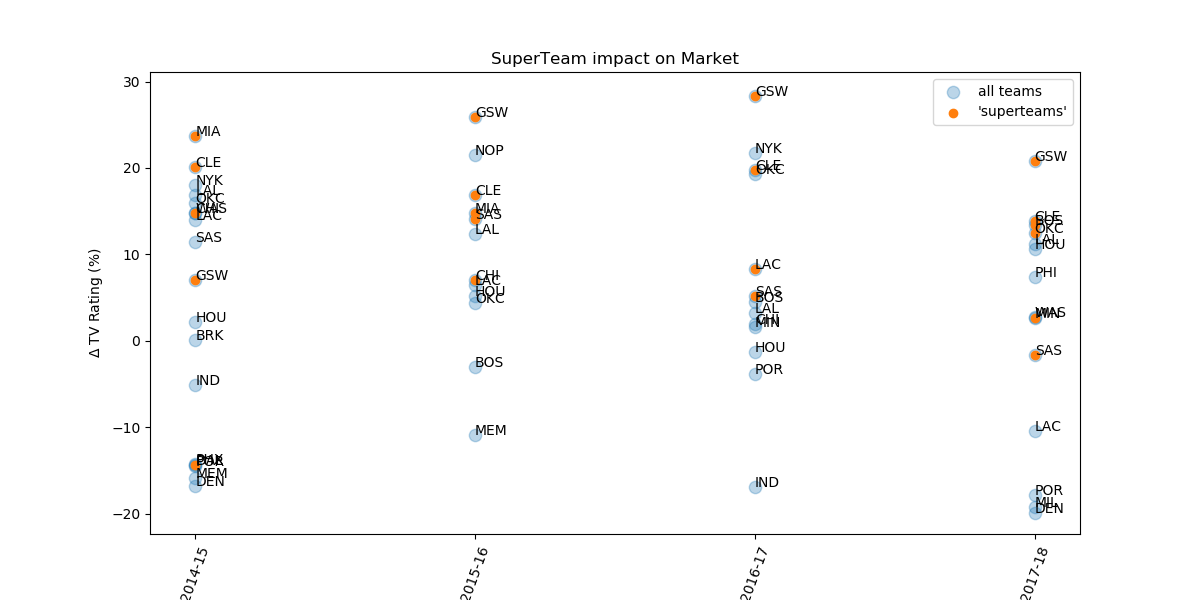

In [127]:
x = []
for i in range(30):
    x.append(np.arange(4))


    
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(x,teamDelta,s=25*np.pi,alpha=0.3,label='all teams')
ax.scatter(x,superTeamDelta, label="'superteams'")

# ax.set_ylim(-0.5,1)
ax.set_ylabel("$\Delta$ TV Rating (%)")

for i, txt in enumerate(teams):
    
    for j in range(4):
        
        ax.annotate(txt, (x[i][j], teamDelta[i][j]))
plt.xticks([0,1,2,3],xticks,rotation=70)
plt.legend(loc='best')        
plt.title("SuperTeam impact on Market")
plt.savefig('../plots/average_deltas.png')

In [128]:
data_dictionary = {}
data_dictionary['Teams'] = teams
data_dictionary

{'Teams': array(['ATL', 'BOS', 'BRK', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
        'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
        'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
        'TOR', 'UTA', 'WAS'],
       dtype='<U4')}